<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title> Visualization with Seaborn </title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #000;
            color: #fff;
        }
        .container {
            max-width: 800px;
            margin: 20px auto;
            background-color: #222;
            padding: 20px;
            border-radius: 5px;
            box-shadow: 0 2px 5px rgba(255, 255, 255, 0.1);
        }
        h1, h2 {
            color: #4caf50; /* Green color */
        }
        .texto1 {
            color: #ccc;
        }
        .authors {
            color: #4caf50; /* Green color */
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Ejercicios Matplotlib IV: Three-Dimensional Plotting in Matplotlib</h1>
        <p class="texto1"><strong><em>Visualización avanzada de datos</em></strong>  </p>
        <p class="texto1"> <em>Curso 2023-2024</em></p>
        <div class="authors">
            <h2>Author:</h2>
            <ul>
                <li>Manuel Rubio Martínez</li>
                <br>
            </ul>
        </div>
    </div>
</body>
</html>
 

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [1]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

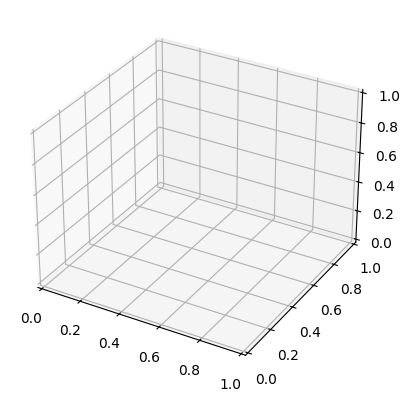

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

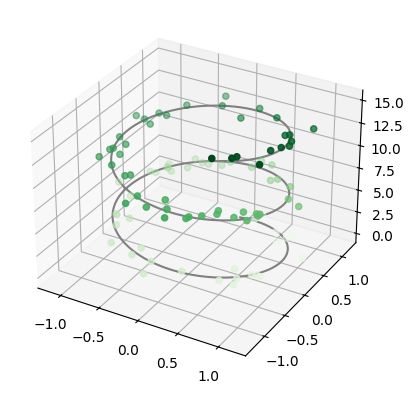

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')


Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-dimensional Contour Plots

Analogous to the contour plots we explored in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb), ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

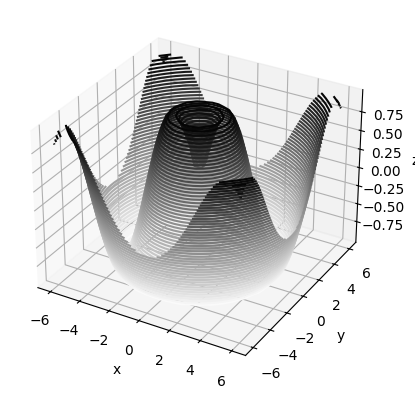

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

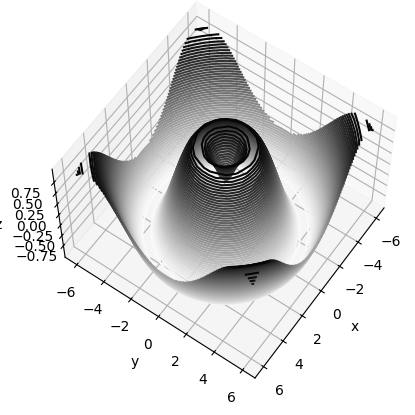

In [7]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

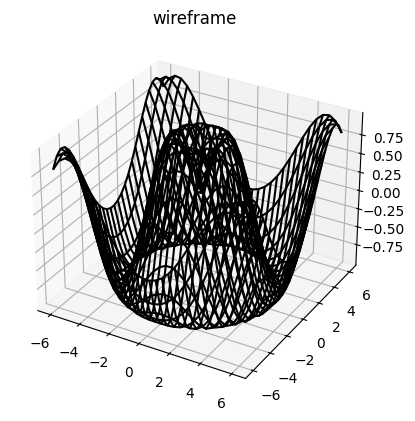

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

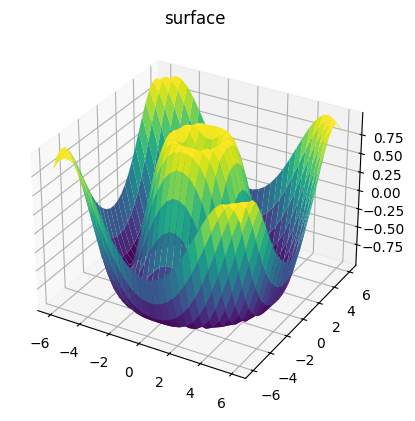

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

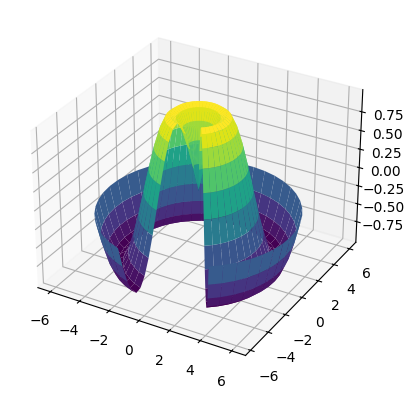

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

## Surface Triangulations

For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient.
In these situations, the triangulation-based plots can be very useful.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from:

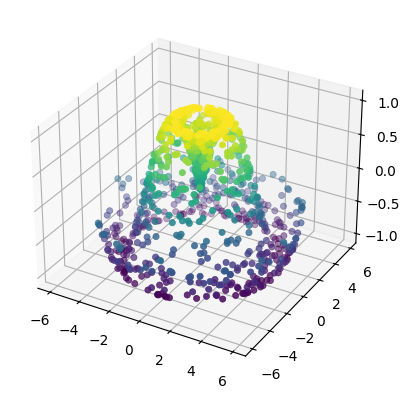

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

This leaves a lot to be desired.
The function that will help us in this case is ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

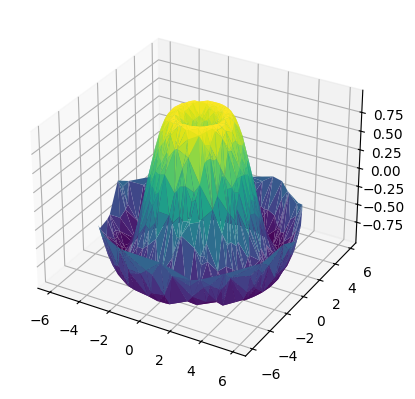

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

### Example: Visualizing a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the *(x, y, z)* positions of the embedded strip.

Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [15]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [16]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

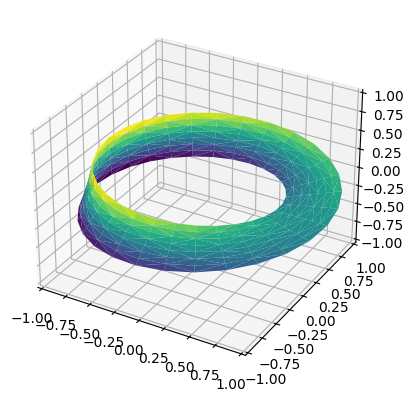

In [17]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

Combining all of these techniques, it is possible to create and display a wide variety of three-dimensional objects and patterns in Matplotlib.

In [18]:
# Ejercicio: Dataset Arritmias.cvs
#   Visualizar en 3D las relaciones entre variables del dataset: masa (g), porcentaje (%) y LVEF. 
#   Escoger diferentes variables (x=col1, y=col2, z=col3)
#   Incluir la clase AV como color o marca y la leyenda correspondiente


import pandas as pd
import numpy as np

df_raw = pd.read_csv("data/Arritmias.csv")
cols = df_raw.columns[1:-4]

# Preproceso: 
#  a) cambiar separador decimal (, por .)
#  b) re-etiquetar VT como clase binaria (0/1)

# Cambio , por . en las series del maldito excel. formated_df: fdf
df = df_raw.copy()

for i in range(len(cols)):
      df[cols[i]] = df[cols[i]].str.replace(",", ".").astype(float)

cols = df.columns[1:-1]
X = df[cols].to_numpy()
Y = df['AV'].to_numpy()

df.head()

,PACIENTES,LV MASS (g),BZ + CORE (g),BZ + CORE (%),BZ (g),BZ (%),CORE (g),CORE (%),CHANNEL MASS (g),LVEF,EDAD,SEXO,AV
0,P1,82.18,5.10,6.21,4.45,5.41,0.64,0.78,0.00,66,71,1,0
1,P2,109.10,16.84,15.43,13.36,12.25,3.48,3.19,8.05,36,53,1,1
2,P3,100.88,5.17,5.12,4.65,4.61,0.51,0.51,0.00,61,63,1,0
3,P4,67.81,5.18,7.64,3.50,5.16,2.48,3.66,2.37,63,74,2,0
4,P5,197.65,47.57,24.07,42.21,21.36,5.36,2.71,21.09,28,84,1,1


Se decide visualizar en primer lugar la combinación de `BZ + CORE (g)`, `BZ + CORE (%)` y `BZ (g)`

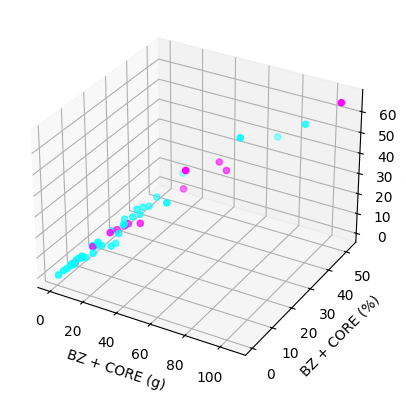

In [19]:
ax = plt.axes(projection='3d')


X = df['BZ + CORE (g)']
Y = df['BZ + CORE (%)']
Z = df['BZ (g)']

color = df['AV']

ax.set_xlabel('BZ + CORE (g)')
ax.set_ylabel('BZ + CORE (%)')
ax.set_zlabel('BZ (g)')

ax.scatter3D(X, Y, Z, c=color, cmap='cool')




Esta pimera representación no permite visualizar los datos de forma correcta, por lo que añadimos vistas desde distintos angulos para obtener una visualización adecuada de los datos. Es por ello que se hace uso de visualizaciones desde distintos ángulos que permiten apreciar de forma correcta la representación de los datos.

Los resultados usando diversas perspectivas son los siguientes:

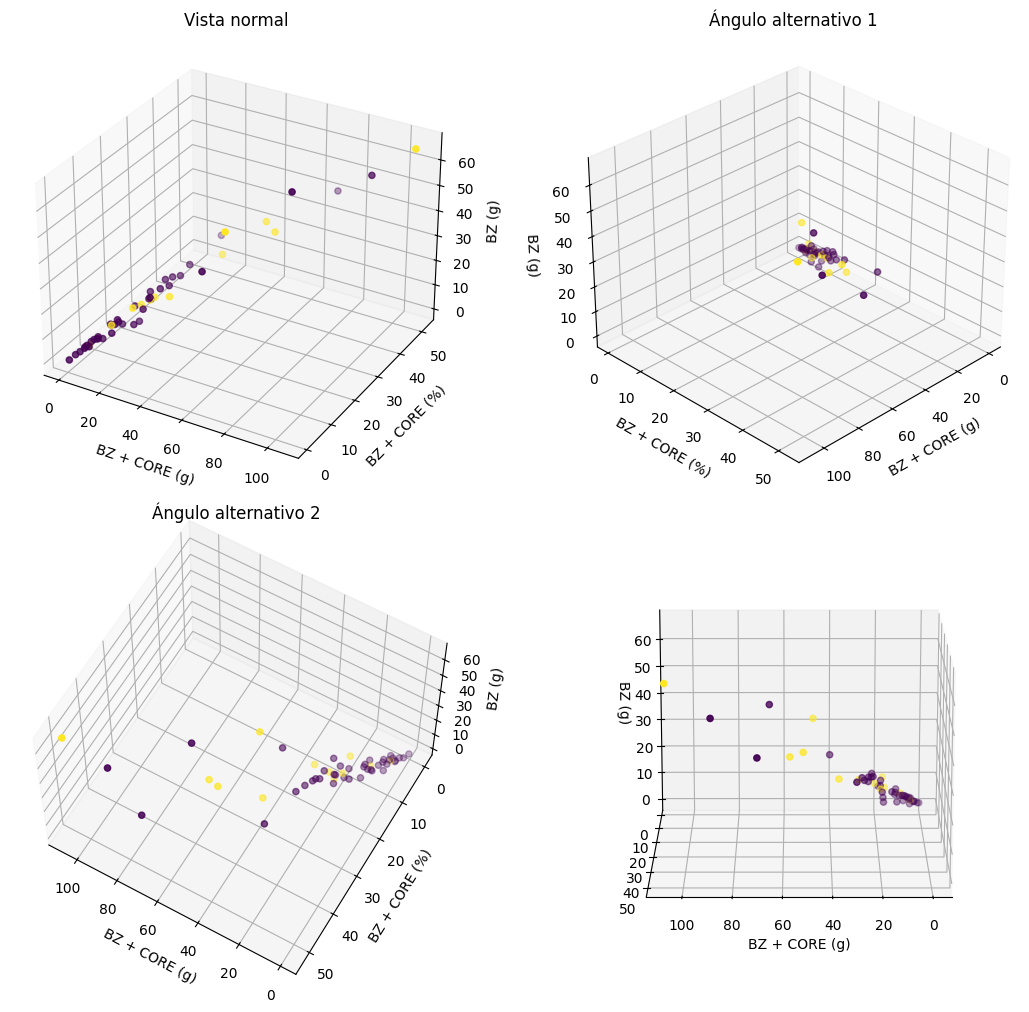

In [20]:

X = df['BZ + CORE (g)']
Y = df['BZ + CORE (%)']
Z = df['BZ (g)']

fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X, Y, Z, c=color)
ax1.set_xlabel('BZ + CORE (g)')
ax1.set_ylabel('BZ + CORE (%)')
ax1.set_zlabel('BZ (g)')
ax1.set_title('Vista normal')

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X, Y, Z, c = color)
ax2.view_init(elev=30, azim=45)
ax2.set_xlabel('BZ + CORE (g)')
ax2.set_ylabel('BZ + CORE (%)')
ax2.set_zlabel('BZ (g)')
ax2.set_title('Ángulo alternativo 1')

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X, Y, Z, c=color)
ax3.view_init(elev=60, azim=120)
ax3.set_xlabel('BZ + CORE (g)')
ax3.set_ylabel('BZ + CORE (%)')
ax3.set_zlabel('BZ (g)')
ax3.set_title('Ángulo alternativo 2')

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X, Y, Z, c = color)
ax4.view_init(elev=15, azim=90)
ax4.set_xlabel('BZ + CORE (g)')
#ax4.set_ylabel('BZ + CORE (%)')
ax4.set_zlabel('BZ (g)')


#plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.5, hspace=0.5)


plt.tight_layout()



plt.show()


Esta visualización si que permite observar la disposición de los datos tridimensionales de forma correcta dentro de este propio notebook. Además, nos permite destacar que, como quizá se podria intuir al tratarse de la medidas de `BZ y CORE` usando metricas distintas, las tres variables estan fuertemente relacioladas linealmente entre sí.